#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

C:\Users\LEE\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [23]:
# TEST 1: loss='categorical_crossentropy'  

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 10s 257us/step - loss: 2.1553 - acc: 0.2010 - val_loss: 2.0706 - val_acc: 0.2650
Epoch 2/12
40000/40000 [==============================] - 7s 177us/step - loss: 1.9422 - acc: 0.3016 - val_loss: 1.9272 - val_acc: 0.3591
Epoch 3/12
40000/40000 [==============================] - 7s 176us/step - loss: 1.8103 - acc: 0.3570 - val_loss: 1.8561 - val_acc: 0.3646
Epoch 4/12
40000/40000 [==============================] - 7s 177us/step - loss: 1.7099 - acc: 0.3897 - val_loss: 1.7252 - val_acc: 0.4245
Epoch 5/12
40000/40000 [==============================] - 7s 175us/step - loss: 1.6309 - acc: 0.4176 - val_loss: 1.6647 - val_acc: 0.4570
Epoch 6/12
40000/40000 [==============================] - 7s 175us/step - loss: 1.5716 - acc: 0.4361 - val_loss: 1.6092 - val_acc: 0.4672
Epoch 7/12
40000/40000 [==============================] - 7s 176us/step - loss: 1.5169 - acc: 0.4547 - val_loss: 1.5517 -

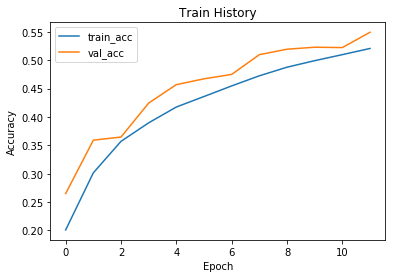

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('acc','val_acc')

In [26]:
# TEST2 binary_crossentropy

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=128, verbose=1)   

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 8s 194us/step - loss: 0.2026 - acc: 0.9204 - val_loss: 0.2122 - val_acc: 0.9149
Epoch 2/12
40000/40000 [==============================] - 7s 175us/step - loss: 0.2020 - acc: 0.9204 - val_loss: 0.2118 - val_acc: 0.9150
Epoch 3/12
40000/40000 [==============================] - 7s 176us/step - loss: 0.2016 - acc: 0.9208 - val_loss: 0.2107 - val_acc: 0.9158
Epoch 4/12
40000/40000 [==============================] - 7s 178us/step - loss: 0.2009 - acc: 0.9213 - val_loss: 0.2107 - val_acc: 0.9156
Epoch 5/12
40000/40000 [==============================] - 7s 180us/step - loss: 0.2002 - acc: 0.9214 - val_loss: 0.2099 - val_acc: 0.9161
Epoch 6/12
40000/40000 [==============================] - 7s 178us/step - loss: 0.2001 - acc: 0.9213 - val_loss: 0.2091 - val_acc: 0.9164
Epoch 7/12
40000/40000 [==============================] - 7s 178us/step - loss: 0.1996 - acc: 0.9215 - val_loss: 0.2083 - 

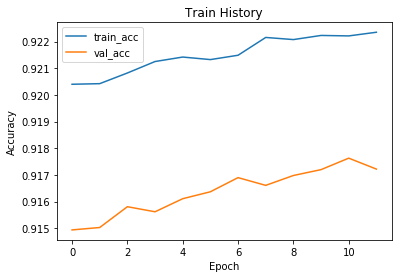

In [27]:
show_train_history('acc','val_acc')

In [28]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 195us/step
accuracy= 0.9174899702072143


In [29]:
# TEST3 MSE

model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=128, verbose=1)   

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 8s 188us/step - loss: 0.0580 - acc: 0.5543 - val_loss: 0.0604 - val_acc: 0.5725
Epoch 2/12
40000/40000 [==============================] - 7s 173us/step - loss: 0.0578 - acc: 0.5535 - val_loss: 0.0604 - val_acc: 0.5730
Epoch 3/12
40000/40000 [==============================] - 7s 175us/step - loss: 0.0577 - acc: 0.5580 - val_loss: 0.0605 - val_acc: 0.5733
Epoch 4/12
40000/40000 [==============================] - 7s 170us/step - loss: 0.0576 - acc: 0.5592 - val_loss: 0.0603 - val_acc: 0.5731
Epoch 5/12
40000/40000 [==============================] - 7s 181us/step - loss: 0.0578 - acc: 0.5566 - val_loss: 0.0603 - val_acc: 0.5725
Epoch 6/12
40000/40000 [==============================] - 7s 172us/step - loss: 0.0577 - acc: 0.5569 - val_loss: 0.0602 - val_acc: 0.5763
Epoch 7/12
40000/40000 [==============================] - 7s 172us/step - loss: 0.0576 - acc: 0.5566 - val_loss: 0.0602 - 

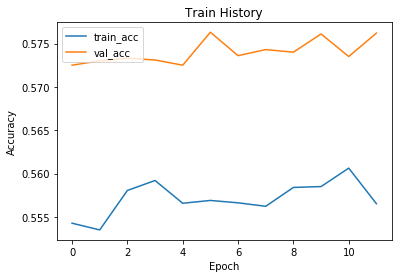

In [30]:
show_train_history('acc','val_acc')

In [31]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 103us/step
accuracy= 0.5773
